In [5]:
import os
import shutil
import pandas as pd

DATASET_PATH = os.path.join("../../", "db")

def load_dataset(dataset_path = DATASET_PATH):
    file_path = os.path.join(dataset_path, "cal_housing.data")
    destination = os.path.join(dataset_path, "cal_housing_copy.data")
    
    with open(file_path, 'r') as read_obj, open(destination, 'w') as new_obj:
        new_obj.write('longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value\n')
        for line in read_obj:
            new_obj.write(line)
    
    return pd.read_csv(destination)

In [6]:
housing = load_dataset()
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0


In [7]:
housing.info()
housing.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20640 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.898014,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.247906,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,295.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


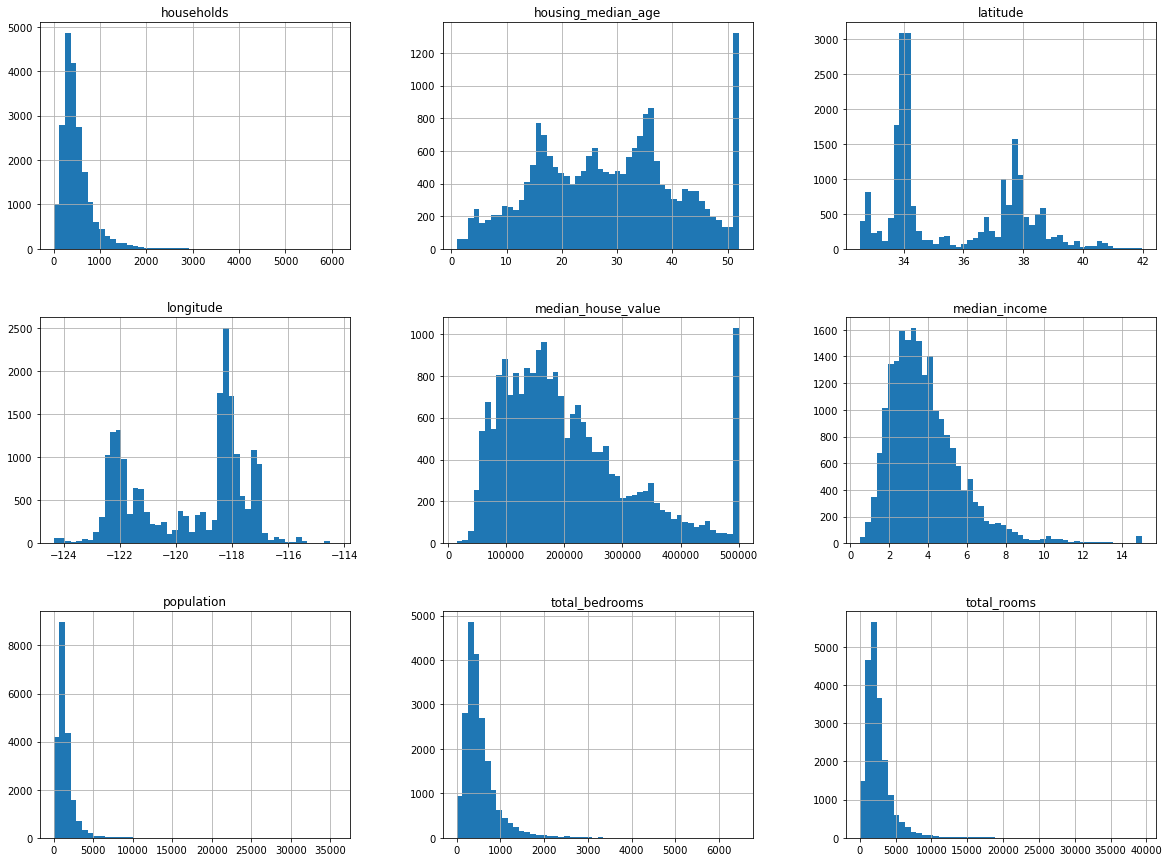

In [8]:
%matplotlib inline

import matplotlib.pyplot as plt

housing.hist(bins=50, figsize=(20,15))
plt.show()

<AxesSubplot:>

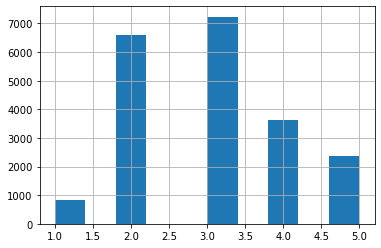

In [9]:
from sklearn.model_selection import train_test_split
import numpy as np

train_test, test_set = train_test_split(housing, test_size=0.3, random_state=38)
housing["income_cat"] = pd.cut(housing["median_income"], bins = [0, 1.5, 3.0, 4.5, 6, np.inf], labels=[1, 2, 3, 4, 5])
housing["income_cat"].hist()

In [10]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.3, random_state=38)

for train_index, test_index in split.split(housing, housing["income_cat"]):
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]
for set_ in (strat_train_set, strat_test_set):
    set_.drop("income_cat", axis=1, inplace=True)

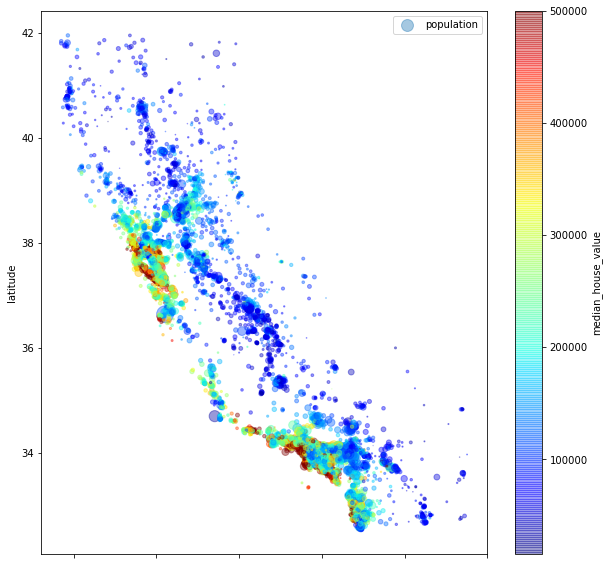

In [11]:
housing = strat_train_set.copy()
housing.plot(kind="scatter", 
             x="longitude", 
             y="latitude",
             alpha=0.4,
             s=housing["population"]/100, 
             label="population", 
             figsize=(10,10), 
             c="median_house_value", 
             cmap=plt.get_cmap("jet"), 
             colorbar=True)
plt.legend()

In [12]:
correlation_matrix = housing.corr()
correlation_matrix["median_house_value"].sort_values(ascending=True)

latitude             -0.151123
longitude            -0.039234
population           -0.016837
total_bedrooms        0.058849
households            0.074687
housing_median_age    0.112529
total_rooms           0.142203
median_income         0.690225
median_house_value    1.000000
Name: median_house_value, dtype: float64

<AxesSubplot:xlabel='median_income', ylabel='median_house_value'>

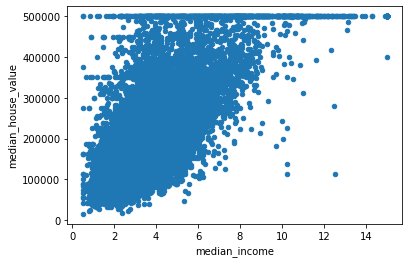

In [13]:
housing.plot(x="median_income", y="median_house_value", kind="scatter")

In [14]:
housing["rooms_per_household"] = housing["total_rooms"] / housing["households"]
housing["bedrooms_per_rooms"] = housing["total_bedrooms"] / housing["total_rooms"]
housing["population_per_household"] = housing["population"] / housing["households"]
correlation_matrix = housing.corr()
correlation_matrix["median_house_value"].sort_values(ascending=True)

bedrooms_per_rooms         -0.258465
latitude                   -0.151123
longitude                  -0.039234
population_per_household   -0.026505
population                 -0.016837
total_bedrooms              0.058849
households                  0.074687
housing_median_age          0.112529
total_rooms                 0.142203
rooms_per_household         0.143862
median_income               0.690225
median_house_value          1.000000
Name: median_house_value, dtype: float64

In [15]:
housing = strat_train_set.drop("median_house_value", axis=1)
housing_labels = strat_train_set["median_house_value"].copy()

In [16]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy="median")
imputer.fit(housing)

SimpleImputer(strategy='median')

In [17]:
tmp = imputer.transform(housing)
housing_tr = pd.DataFrame(tmp, columns=housing.columns, index=housing.index)

In [18]:
from sklearn.base import BaseEstimator, TransformerMixin

rooms_ix, bedrooms_ix, population_ix, households_ix = 3, 4, 5 ,6

class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    def __init__(self, add_bedrooms_per_room = True):
        self.add_bedrooms_per_room = add_bedrooms_per_room
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        rooms_per_household = X[:, rooms_ix] / X[:, households_ix]
        population_per_household = X[:, population_ix] / X[:, households_ix]
        if self.add_bedrooms_per_room:
            bedrooms_per_room = X[:, bedrooms_ix] / X[:, rooms_ix]
            return np.c_[X, rooms_per_household, population_per_household, bedrooms_per_room]
        else:
            return np.c_[X, rooms_per_household, population_per_household]
attr_adder = CombinedAttributesAdder(add_bedrooms_per_room=False)
housing_extra_attribs = attr_adder.transform(housing.values)

In [19]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

num_pipeline = Pipeline([("imputer", SimpleImputer(strategy="median")), 
                         ("attribs_adder", CombinedAttributesAdder()), 
                         ("std_scaler", StandardScaler())])
housing_prepared = num_pipeline.fit_transform(housing)

In [20]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(housing_prepared, housing_labels)

LinearRegression()

In [21]:
some_data = housing.iloc[:5]
some_labels = housing_labels.iloc[:5]
some_data_prepared = num_pipeline.transform(some_data)
print("Predictions: ", lin_reg.predict(some_data_prepared))
print("Labels: ", list(some_labels))

Predictions:  [109071.78736193 612484.37024663 337588.79959808 175386.84127627
 223536.12002967]
Labels:  [132200.0, 500001.0, 379500.0, 135200.0, 157300.0]


In [22]:
from sklearn.metrics import mean_squared_error

housing_predictions = lin_reg.predict(housing_prepared)
lin_mse = mean_squared_error(housing_labels, housing_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

68317.19962210108

In [23]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor()
tree_reg.fit(housing_prepared, housing_labels)
housing_predictions = tree_reg.predict(housing_prepared)
tree_mse = mean_squared_error(housing_labels, housing_predictions)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

0.0

In [24]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(tree_reg, housing_prepared, housing_labels, scoring="neg_mean_squared_error", cv=10)
tree_rmse_scores = np.sqrt(-scores)

print("Scores: ", tree_rmse_scores)
print("Mean: ", tree_rmse_scores.mean())
print("Std: ", tree_rmse_scores.std())

Scores:  [73467.43031432 70861.77502255 75861.50702574 71804.21656739
 66412.13052816 69359.54221271 79994.22151825 73545.2319802
 72733.64750039 83011.89622165]
Mean:  73705.15988913653
Std:  4643.430759485666


In [25]:
lin_reg_scores = cross_val_score(lin_reg, housing_prepared, housing_labels, scoring="neg_mean_squared_error", cv=10)
lin_reg_rmse_scores = np.sqrt(-lin_reg_scores)

print("Scores: ", lin_reg_rmse_scores)
print("Mean: ", lin_reg_rmse_scores.mean())
print("Std: ", lin_reg_rmse_scores.std())

Scores:  [66965.12217297 65062.75244817 71121.34140034 68271.41377155
 67010.59527237 68779.55932677 69481.85350895 65242.90920334
 68004.22173203 74813.07793318]
Mean:  68475.28467696795
Std:  2739.6715189494753


In [26]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=2, random_state=0).fit(housing_prepared)
kmeans.predict(housing_prepared, housing_labels)

kmeans_scores = cross_val_score(kmeans, housing_prepared, housing_labels, scoring="neg_mean_squared_error", cv=10)
kmeans_rmse_scores = np.sqrt(-kmeans_scores)

print("Scores: ", kmeans_rmse_scores)
print("Mean: ", kmeans_rmse_scores.mean())
print("Std: ", kmeans_rmse_scores.std())

Scores:  [237416.8393934  231008.92715267 239820.76662075 237432.04065115
 239252.68978139 238000.04563347 238220.74486877 234745.72084692
 235133.44970718 237691.70092392]
Mean:  236872.2925579602
Std:  2462.8470457177464


In [27]:
from sklearn.ensemble import RandomForestRegressor

forest = RandomForestRegressor()
forest.fit(housing_prepared, housing_labels)

forest_scores = cross_val_score(forest, housing_prepared, housing_labels, scoring="neg_mean_squared_error", cv=10)
forest_rmse_scores = np.sqrt(-forest_scores)

print("Scores: ", forest_rmse_scores)
print("Mean: ", forest_rmse_scores.mean())
print("Std: ", forest_rmse_scores.std())

Scores:  [51586.67092416 47794.16129653 53700.53918592 47021.28270988
 48488.28401293 49345.22228346 53196.93245106 49261.31083841
 52016.07278528 53818.56991481]
Mean:  50622.90464024323
Std:  2412.384247739873


In [28]:
from sklearn.model_selection import GridSearchCV

forest = RandomForestRegressor()
param_grid = [
    {'n_estimators': [20, 30, 40],
     'max_features': [2, 4, 6, 8],
    }, {'n_estimators': [10, 20],
        'max_features': [2, 4, 6],
        'bootstrap': [False]
    }
]

grid_search = GridSearchCV(forest, param_grid, scoring='neg_mean_squared_error', cv=5, return_train_score=True)
grid_search.fit(housing_prepared, housing_labels)
grid_search.best_params_

{'bootstrap': False, 'max_features': 6, 'n_estimators': 20}

In [29]:
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

55049.97088150483 {'max_features': 2, 'n_estimators': 20}
54726.394597577746 {'max_features': 2, 'n_estimators': 30}
54117.11698305219 {'max_features': 2, 'n_estimators': 40}
52814.07430337365 {'max_features': 4, 'n_estimators': 20}
51769.88731782676 {'max_features': 4, 'n_estimators': 30}
51595.68191813528 {'max_features': 4, 'n_estimators': 40}
52409.414404687326 {'max_features': 6, 'n_estimators': 20}
51629.03367052573 {'max_features': 6, 'n_estimators': 30}
51432.770953781204 {'max_features': 6, 'n_estimators': 40}
52500.745981053544 {'max_features': 8, 'n_estimators': 20}
51808.68535493394 {'max_features': 8, 'n_estimators': 30}
51766.65304460291 {'max_features': 8, 'n_estimators': 40}
56687.94595245556 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
53704.55246699884 {'bootstrap': False, 'max_features': 2, 'n_estimators': 20}
52148.0964377486 {'bootstrap': False, 'max_features': 4, 'n_estimators': 10}
51231.986881121586 {'bootstrap': False, 'max_features': 4, 'n_estim

In [30]:
final_model = grid_search.best_estimator_

X_test = strat_test_set.drop("median_house_value", axis=1)
y_test = strat_test_set["median_house_value"].copy()

X_test_prepared = num_pipeline.transform(X_test)

final_predictions = final_model.predict(X_test_prepared)
final_mse = mean_squared_error(y_test, final_predictions)
final_rmse = np.sqrt(final_mse)
final_rmse

53086.61348475145

In [31]:
strat_test_set

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
18765,-122.27,40.53,17.0,2255.0,416.0,1171.0,411.0,2.8750,129800.0
6210,-117.90,34.07,35.0,1646.0,294.0,1056.0,280.0,3.0550,172000.0
10112,-117.94,33.94,30.0,1596.0,307.0,845.0,309.0,4.5096,241100.0
8504,-118.30,33.88,26.0,1221.0,312.0,807.0,330.0,4.0536,253600.0
9082,-118.17,34.69,12.0,4881.0,803.0,2188.0,724.0,4.1667,171900.0
...,...,...,...,...,...,...,...,...,...
121,-122.24,37.85,37.0,334.0,54.0,98.0,47.0,4.9643,335000.0
10736,-117.90,33.61,41.0,1521.0,328.0,527.0,275.0,4.0764,500001.0
9292,-122.45,38.01,36.0,4501.0,832.0,2196.0,800.0,4.3182,252700.0
14651,-117.15,32.81,34.0,1629.0,318.0,900.0,282.0,3.1458,178300.0


In [32]:
demo = pd.DataFrame({
    'longitude': [-128.72],
    'latitude': [58.09],
    'housing_median_age': [6],
    'total_rooms': [1250],
    'total_bedrooms': [400],
    'population': [600],
    'households': [300],
    'median_income': [3.572]
})

demo_transformed = num_pipeline.transform(demo)

final_model.predict(demo_transformed)

array([153455.])